In [116]:
import jax.numpy as jnp
import jax

In [117]:
I = jnp.eye(2) * 0.0001

In [136]:
A = 1
w = 5
Phi = 2

In [137]:
# Fisher information of the simple harmonic oscillator
def SHO(w, A, Phi, t):
    return jnp.array([A * jnp.cos(w * t + Phi), -A * w * jnp.sin(w * t + Phi)])

def d_w_SHO(w, A, Phi, t):
    return jnp.array([-A * t * jnp.sin(w * t + Phi), -A *w* t * jnp.cos(w * t + Phi) - A * jnp.sin(w * t + Phi)])

def FisherInformation(w, A, Phi, t, Info):
    return Info + jnp.outer(d_w_SHO(w, A, Phi, t), d_w_SHO(w, A, Phi, t))

t = jnp.linspace(0, 10, 100)
F = jax.vmap(FisherInformation, in_axes=(None, None, None, 0, None))
det_F = jax.vmap(jnp.linalg.det)(F(w, A, Phi, t, I))

In [138]:
I2 = I + F(w, A, Phi, t, I)[jnp.argmax(det_F)]
det_F2 = jax.vmap(jnp.linalg.det)(F(w, A, Phi, t, I2))

In [139]:
I3 = I2 + F(w, A, Phi, t, I2)[jnp.argmax(det_F2)]
det_F3 = jax.vmap(jnp.linalg.det)(F(w, A, Phi, t, I3))

In [140]:
I4 = I3 + F(w, A, Phi, t, I3)[jnp.argmax(det_F3)]
det_F4 = jax.vmap(jnp.linalg.det)(F(w, A, Phi, t, I4))

In [141]:
I5 = I4 + F(w, A, Phi, t, I4)[jnp.argmax(det_F3)]
det_F3 = jax.vmap(jnp.linalg.det)(F(w, A, Phi, t, I5))

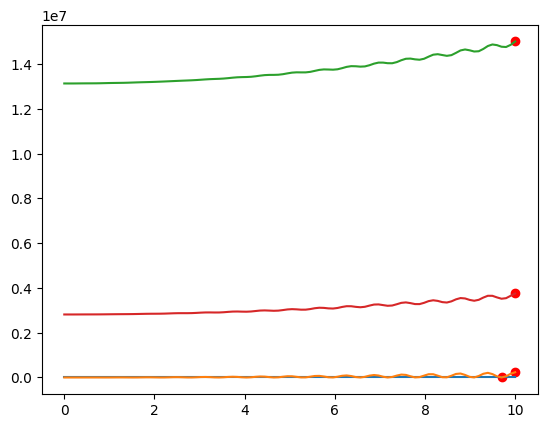

In [142]:
import matplotlib.pyplot as plt
plt.plot(t, det_F)
plt.scatter(t[jnp.argmax(det_F)], det_F[jnp.argmax(det_F)], c='r')
# plt.vlines(t[jnp.argmax(det_F)], 0, 1, colors='r')
plt.plot(t, det_F2)
plt.scatter(t[jnp.argmax(det_F2)], det_F2[jnp.argmax(det_F2)], c='r')
# plt.vlines(t[jnp.argmax(det_F2)], 0, 1, colors='g')
plt.plot(t, det_F3)
plt.scatter(t[jnp.argmax(det_F3)], det_F3[jnp.argmax(det_F3)], c='r')
plt.vlines(t[jnp.argmax(det_F3)], 0, 1, colors='b')
plt.plot(t, det_F4)
plt.scatter(t[jnp.argmax(det_F4)], det_F4[jnp.argmax(det_F4)], c='r')
plt.vlines(t[jnp.argmax(det_F4)], 0, 1, colors='b')

In [83]:
t[jnp.argmax(det_F4)]

Array(9.59596, dtype=float32)

In [87]:
jnp.argmax(det_F3)

Array(95, dtype=int32)

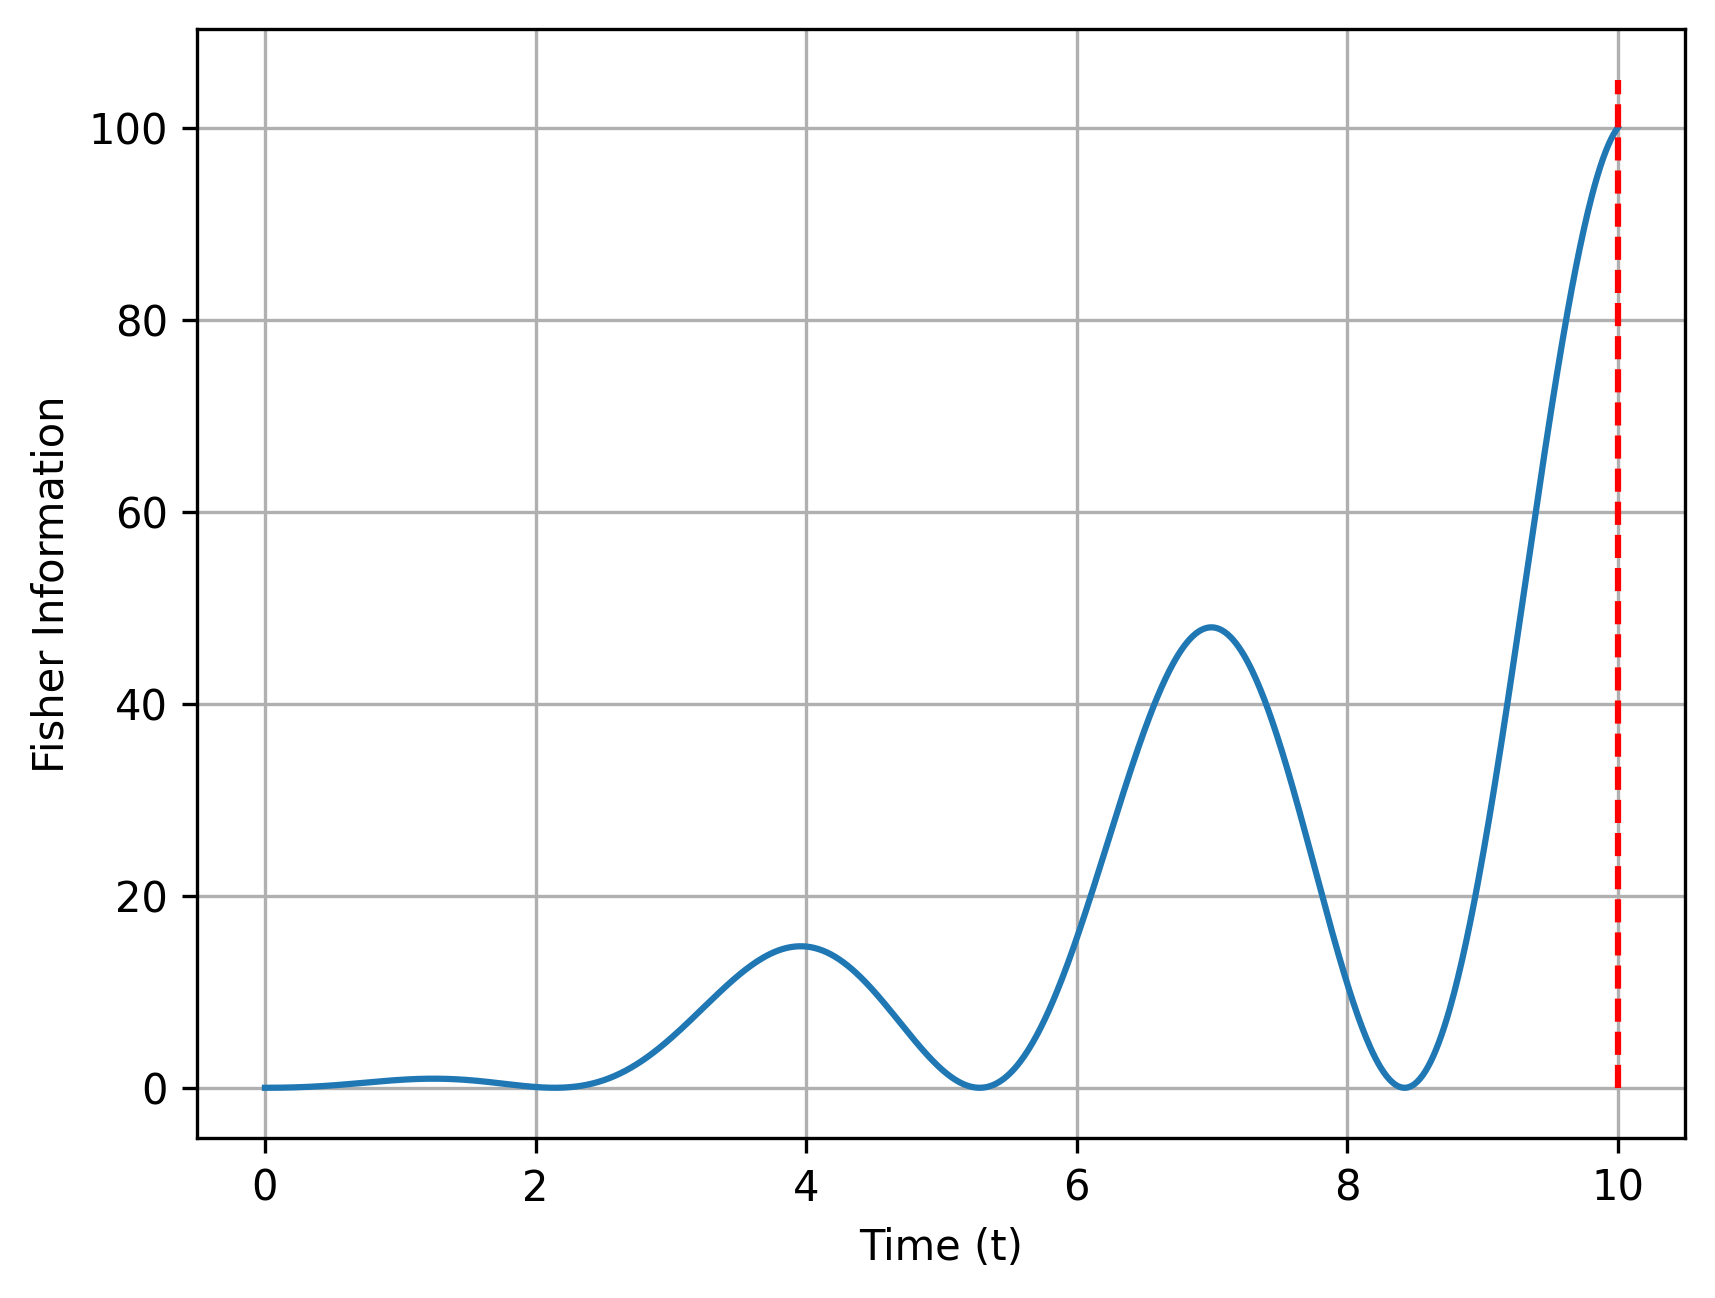

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
sigma = 1.0  # Standard deviation, adjust as needed
A = 1.0      # Amplitude, adjust as needed
omega = 1.0  # Angular frequency, adjust as needed
phi = 1.0    # Phase shift, adjust as needed

# Time array
t = np.linspace(0, 10, 1000)  # Creates an array of time values from 0 to 10

# The function to be plotted
def plot_function(t, sigma, A, omega, phi):
    return (1/sigma**2) * A**2 * t**2 * np.sin(omega * t + phi)**2

# Calculate the y values
y = plot_function(t, sigma, A, omega, phi)

# Plotting
fig = plt.figure(dpi=300)
plt.plot(t, y)
# plt.title('Plot of $\\frac{1}{\\sigma^2} A^2 t^2 \\sin^2(\\omega t + \\phi)$')
plt.vlines(t[np.argmax(y)], 0, 105, colors='r', linestyles='dashed')
plt.xlabel('Time (t)')
plt.ylabel('Fisher Information')
plt.grid(True)
plt.show()